# Fitting the data

In [1]:
import ProjectPackage.FitSB as FitSB
import ProjectPackage.fit as fit
import ProjectPackage.DataExtraction as de
import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Fitting on MC data

> * A first fit on Monte Carlo (mc) data for each pT range, to give entry parameters for the double sided crystal ball (2CB) when fitting the experimental (xp) data. The 2CB is fitted on the reconstructed invariant mass spectrum for dimuons with $J/\Psi$ GenmotherPDGcode.
> * All the fitted data remains accessible in the dictCBmc dictionnary if needed

In [2]:
runmc = 290350
dict_histmc = de.read_dict_hist(str(runmc),p=1)
dictCBmc = FitSB.fitmcCB2dict(dict_histmc)
dfdictmc = {'MJpsimc': dictCBmc['MJPsimc'],'errMJpsimc': dictCBmc['errMJPsimc'], 'Nrawmc': dictCBmc['Nrawmc'], 'errNrawmc': dictCBmc['errNrawmc']}
dfFitmc= pd.DataFrame.from_dict(dfdictmc)
dfFitmc.to_csv (r'./Saved/dfNrawmc'+str(runmc)+'.csv')

  0%|          | 0/7 [00:00<?, ?it/s]/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:44: RuntimeWarning: overflow encountered in double_scalars
  A2 = (n2/aa2)**n2 * fit.exp(- aa2**2 / 2)
/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:49: RuntimeWarning: invalid value encountered in multiply
  total += ((x-xb)/sig >= a2) * N * A2 * (B2 + (x-xb)/sig)**(-n2)
/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:81: RuntimeWarning: invalid value encountered in sqrt
  paramsferr = np.sqrt(np.diag(covf))
/Applications/Miniforge3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
 29%|██▊       | 2/7 [00:00<00:00, 11.52it/s]

0
1
2


 57%|█████▋    | 4/7 [00:00<00:00, 13.00it/s]

3
4
5


100%|██████████| 7/7 [00:00<00:00, 13.53it/s]

6


In [3]:
dfFitmc

,MJpsimc,errMJpsimc,Nrawmc,errNrawmc
0,3.085915,0.003129,13.303381,None
1,3.087012,inf,10.397259,None
2,3.091039,0.002841,12.528065,None
3,3.078557,inf,3.315447,None
4,3.101559,inf,3.087036,None
5,3.100325,inf,2.088653,None
6,0.692927,inf,12.341176,None


Most of the covariance matrices could not be computed, but it doesn't prevent us to work with the parameters.
I tried to fit with two 2CB to take the resonance into account but it was less efficient with the code as it is designed for now

## Fitting on xp data

> * The data is stored in a dictionnary containing the data for all the $p_T$ ranges. The code computes for each entry a fitting with a global function written as a combination of a 2CB with a double exponential. 
< * The 2CB modelizes the invariant mass excess due to the $J/\Psi$, with the left tail due to the absorber and the right tail to (?? cannot remember and cannot find it on web)
> * The double exponential modelizes the background on each side of the 2CB. The second one is needed to take into account the apparition of other resonances

In [4]:
run = 291397
dict_hist = de.read_dict_hist(str(run),p=0)

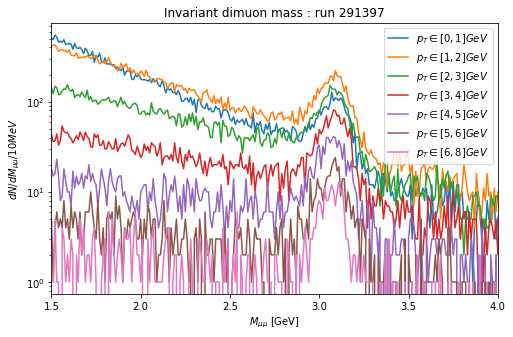

In [5]:
fig, axs = plt.subplots(figsize=(8, 5)) 
plt.semilogy()
plt.plot(dict_hist[(0,1)][1][0:-1],dict_hist[(0,1)][0])
plt.plot(dict_hist[(1,2)][1][0:-1],dict_hist[(1,2)][0])
plt.plot(dict_hist[(2,3)][1][0:-1],dict_hist[(2,3)][0])
plt.plot(dict_hist[(3,4)][1][0:-1],dict_hist[(3,4)][0])
plt.plot(dict_hist[(4,5)][1][0:-1],dict_hist[(4,5)][0])
plt.plot(dict_hist[(5,6)][1][0:-1],dict_hist[(5,6)][0])
plt.plot(dict_hist[(6,8)][1][0:-1],dict_hist[(6,8)][0])
plt.xlim(1.5,4.)
axs.set_ylabel("$dN/dM_{\mu\mu}/10MeV$")
plt.title("Invariant dimuon mass : run "+str(run))
axs.legend(["$p_T\in[0,1]GeV$","$p_T\in[1,2]GeV$","$p_T\in[2,3]GeV$","$p_T\in[3,4]GeV$","$p_T\in[4,5]GeV$","$p_T\in[5,6]GeV$","$p_T\in[6,8]GeV$"])
axs.set_xlabel("$M_{\mu\mu}$ [GeV]")
plt.show()
fig.savefig("./Saved/AllpT"+str(run)+".png")

> * Once again the fit is performed on xp data for each pT range, this time with the corresponding entry parameters found with MC data for the 2CB. All the fitting data is returned as a dictionary for the notebook purpose, and saved as a dataframe.
> * Each ydata and error entry with a 0 value and the corresponding xdata entry is removed from the data set before being fitted
> * The 2CB N entry parameter is readjusted with the maximum ydata value since it is not correlated with the MC value
> * The exponential entry parameters are computed by calculated the slope on each side of the 2CB, then the constant thanks to the slope (log(y)=a+xb). 
> * By doing so each set of data could be fitted, and the fit was able to return the covariance matrices
> * The fitting ranges need to be tweaked for each $p_T$ range data set, since the behaviour of the $J/\Psi$ production differs. 
> * The last two sets could not be fitted because of the lack of statistics

In [6]:
dict2CB = FitSB.fitCB2dict(dict_hist,dictCBmc['paramsfmc'])
dfdict = {'MJpsi': dict2CB['MJPsi'],'errMJpsi': dict2CB['errMJPsi'], 'Nraw': dict2CB['Nraw'], 'errNraw': dict2CB['errNraw']}
dfFit= pd.DataFrame.from_dict(dfdict)
dfFit.to_csv (r'./Saved/dfNraw'+str(run)+'.csv')

  0%|          | 0/7 [00:00<?, ?it/s]/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/errFit.py:65: RuntimeWarning: invalid value encountered in double_scalars
  total += ((x-xb)/sig >= a2) * N * A2 * (B2 + (x-xb)/sig)**(-n2)
/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/errFit.py:64: RuntimeWarning: invalid value encountered in double_scalars
  total += ((x-xb)/sig <= -a1) * N * A1 * (B1 - (x-xb)/sig)**(-n1)


0


 14%|█▍        | 1/7 [00:08<00:48,  8.07s/it]/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:49: RuntimeWarning: overflow encountered in power
  total += ((x-xb)/sig >= a2) * N * A2 * (B2 + (x-xb)/sig)**(-n2)
/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:49: RuntimeWarning: invalid value encountered in multiply
  total += ((x-xb)/sig >= a2) * N * A2 * (B2 + (x-xb)/sig)**(-n2)


1


/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/errFit.py:65: RuntimeWarning: overflow encountered in double_scalars
  total += ((x-xb)/sig >= a2) * N * A2 * (B2 + (x-xb)/sig)**(-n2)
 29%|██▊       | 2/7 [00:16<00:41,  8.33s/it]/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:44: RuntimeWarning: overflow encountered in double_scalars
  A2 = (n2/aa2)**n2 * fit.exp(- aa2**2 / 2)


2


 43%|████▎     | 3/7 [00:25<00:34,  8.56s/it]

3


 57%|█████▋    | 4/7 [00:34<00:26,  8.92s/it]

4


/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:42: RuntimeWarning: overflow encountered in double_scalars
  A1 = (n1/aa1)**n1 * fit.exp(- aa1**2 / 2)
/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:48: RuntimeWarning: invalid value encountered in multiply
  total += ((x-xb)/sig <= -a1) * N * A1 * (B1 - (x-xb)/sig)**(-n1)
/Users/marie/Dropbox/Etudes/M2S9/qqbar2mumu/Notebooks/ProjectPackage/FitSB.py:48: RuntimeWarning: overflow encountered in multiply
  total += ((x-xb)/sig <= -a1) * N * A1 * (B1 - (x-xb)/sig)**(-n1)
 71%|███████▏  | 5/7 [00:44<00:18,  9.04s/it]

5


 86%|████████▌ | 6/7 [00:52<00:08,  8.93s/it]

6


100%|██████████| 7/7 [01:02<00:00,  8.92s/it]


In [7]:
dfFit

,MJpsi,errMJpsi,Nraw,errNraw
0,3.094768,0.004306,19.572634,NaN
1,3.082904,0.002995,33.935307,NaN
2,3.079548,0.002858,26.978609,NaN
3,3.076897,0.002863,11.145714,NaN
4,3.070703,0.004615,7.265862,NaN
5,3.083510,25.047456,0.028449,NaN
6,3.081391,19.294560,0.014182,NaN


In [8]:
def plotf(dict_hist,dict2CB):
    for idx in range(7):
        fig, axs = plt.subplots(figsize=(8, 5)) 
        plt.style.use('seaborn')
        plt.semilogy()
        miny=0.01
        idxstep=1
        if idx == 6: idxstep=2
        if idx > 3: miny=0.
        maxy = 400
        plt.xlim(2.6,3.5)
        plt.ylim(miny,maxy)
        xdata = dict_hist[(idx,idx+idxstep)][1][0:-1]
        bg = fit.expo(dict2CB['paramsf'][idx][7:9],xdata)+fit.expo(dict2CB['paramsf'][idx][9:11],xdata)
        #plt.plot(dict_hist[(idx,idx+idxstep)][1][0:-1],dict_hist[(idx,idx+idxstep)][0],drawstyle='steps', ls=":",label="Data",color='#006699')
        plt.errorbar(dict2CB['xf'][idx],dict2CB['yf'][idx],dict2CB['sigmaf'][idx],drawstyle='steps',ls=":",label="Fitted data",color='#006699')
        plt.plot(dict2CB['xf'][idx],dict2CB['yfGlob'][idx], label="Global 2CB fit",color='#e65c00',linewidth=3)
        plt.plot(xdata,dict2CB['yfCB'][idx], label="2CB fit",color='#FF1919')       
        plt.plot(xdata,bg, label="Background fit",ls=":",color='#e65c00')  
        axs.set_ylabel("$dN/dM_{\mu\mu}/10MeV$")
        plt.title("Invariant dimuon mass for $p_T\in["+str(idx)+","+str(idx+idxstep)+"]GeV$ : run "+str(run))
        axs.set_xlabel("$M_{\mu\mu}$ [GeV]")
        plt.legend(loc='best')
        fig.savefig("./Saved/Plotsfit2CB/pTin"+str(idx)+str(idx+idxstep)+"GeVfit2CB.png")
        plt.show()
    

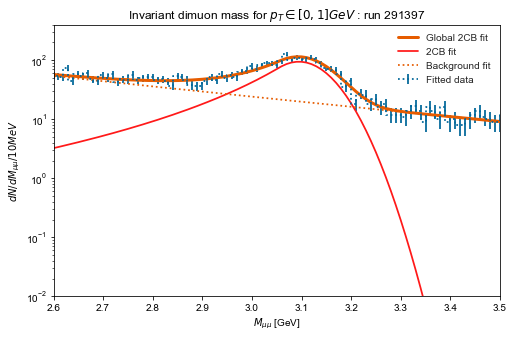

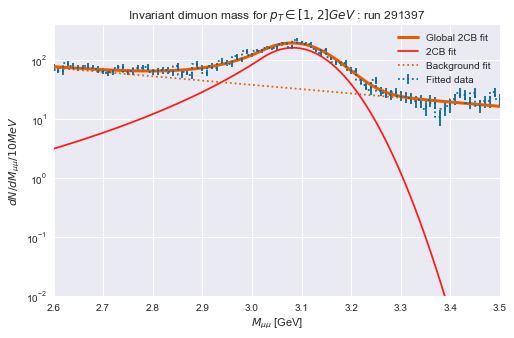

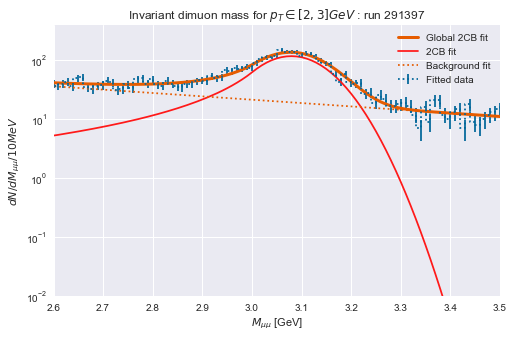

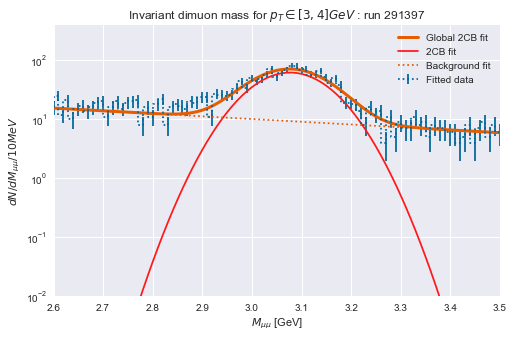

/var/folders/x6/15q1l43d349gqw71jqgbgxgh0000gn/T/ipykernel_11121/3323236241.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(miny,maxy)


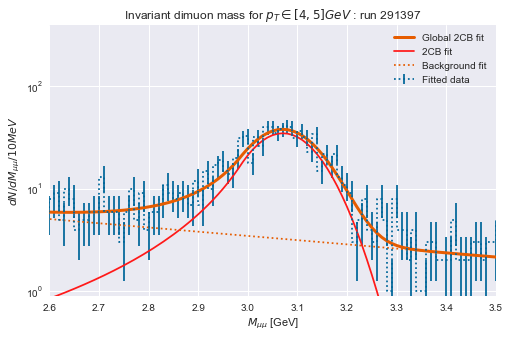

/var/folders/x6/15q1l43d349gqw71jqgbgxgh0000gn/T/ipykernel_11121/3323236241.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(miny,maxy)


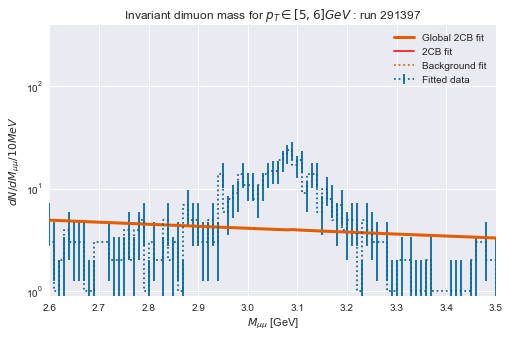

/var/folders/x6/15q1l43d349gqw71jqgbgxgh0000gn/T/ipykernel_11121/3323236241.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(miny,maxy)


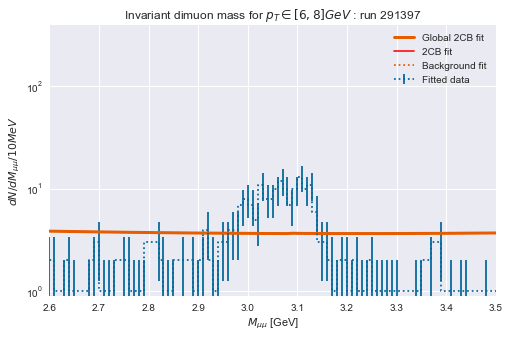

In [9]:
plotf(dict_hist,dict2CB)